In [ ]:
from sklearn.datasets import make_moons, make_circles, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random

###Construcción de un modelo bagging para clasificación

In [ ]:
X, y = make_moons(noise=0.2, random_state=2)

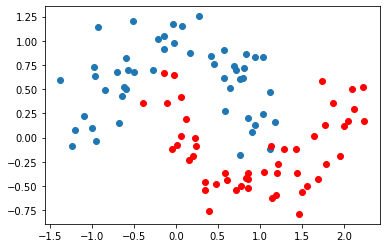

In [ ]:
plt.plot(X[y==0,0],X[y==0,1],'o')
plt.plot(X[y==1,0],X[y==1,1],'ro')

**PROCESO A SEGUIR:**

A) Definición del modelo estimador.

B) Definición del número de grupos (bags) y tamaño de cada uno de ellos.

C) Definición del tamaño de los grupos.

D) Definición de la función para crear los grupos.

E) Creación de los grupos

In [ ]:
dt_class = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=6,
                                  random_state=0)

Definimos el número de grupos de Bagging:

In [ ]:
T = 100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2)

In [ ]:
y_train

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
#Generar modelo con un único arbol y comparar con resultado ensemble

In [ ]:
size_subgrupos = 0.6

Función para definir cada uno de los grupos.

NOTA: En cada grupo NO tendremos muestras repetidas. Pueden estar repetidas en DISTINTOS grupos

In [ ]:
def bootstrap(size_subgrupos, X_train):
  #Tamaño de los "bags" (0.6 del dataset)
  size = int(size_subgrupos*len(X_train))

  #Seleccionamso
  lista_indices = []
  while len(lista_indices) < size:
    indice = random.randint(0,len(X_train)-1)
    if indice not in lista_indices:
      lista_indices.append(indice)
  return lista_indices

Generamos T "bags" y entrenamos los modelos para cada uno de ellos:

In [ ]:
treebag = []
for t in range(T):
    lista_indices = bootstrap(size_subgrupos, X_train)
    Xtr = X_train[lista_indices]
    ytr = y_train[lista_indices]

    dt_class.fit(Xtr, ytr)
    treebag.append(dt_class)

Predicción en train:

In [ ]:
#Generamos una matriz de ceros que iremos rellenando
y_pred_train = np.zeros((y_train.size, len(treebag)),
                        dtype='float')
for n, w in enumerate(treebag):
    #Recorremos la matriz haciendo predicciones para cada modelo
    #Sobre el conjunto de train.
    y_pred_train[:, n] = w.predict(X_train)
#Generamos el vector con las prboabilidades de la clase de cada muestra
#Redondeamos el resultado
y_pred_train = np.mean(y_pred_train, axis = 1)
y_pred_train = list(map(int, y_pred_train))

In [ ]:
#Prediccion test
y_pred_test = np.zeros((y_test.size, len(treebag)),
                       dtype='float')
for n, w in enumerate(treebag):
    y_pred_test[:, n] = w.predict(X_test)
y_pred_test = np.mean(y_pred_test, axis = 1)
y_pred_test = list(map(int, y_pred_test))

In [ ]:
#Calculo metricas train:


In [ ]:
#Calculo métricas train

###[EJERCICIO] Construcción de un modelo bagging para regresión:

In [ ]:
X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=6,random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2)

In [ ]:
def bootstrap(size_subgrupos, X_train):
  size = int(size_subgrupos*len(X_train))

  lista_indices = []
  while len(lista_indices) < size:
    indice = random.randint(0,len(X_train)-1)
    if indice not in lista_indices:
      lista_indices.append(indice)
  return lista_indices

In [ ]:
# Train
T = 100
treebag = []
for t in range(T):
    lista_indices = bootstrap(size_subgrupos, X_train)
    Xtr = X_train[lista_indices]
    ytr = y_train[lista_indices]

    dt_reg.fit(Xtr, ytr)
    treebag.append(dt_reg)

In [ ]:
#Prediccion train
y_pred_train = np.zeros((y_train.size, len(treebag)),
                        dtype='float')
for n, w in enumerate(treebag):
    y_pred_train[:, n] = w.predict(X_train)
y_pred_train = np.mean(y_pred_train, axis = 1)

In [ ]:
#Prediccion test
y_pred_test = np.zeros((y_test.size, len(treebag)),
                       dtype='float')
for n, w in enumerate(treebag):
    y_pred_test[:, n] = w.predict(X_test)
y_pred_test = np.mean(y_pred_test, axis = 1)

In [ ]:
y_pred_test

array([19.44285714, 46.61666667, 33.05      , 21.12816901, 23.83333333,
       21.12816901, 21.12816901,  7.35      , 12.832     , 21.12816901,
       15.45      , 21.12816901, 31.        , 25.84      , 14.68947368,
       14.68947368, 25.84      , 50.        , 12.832     , 26.7       ,
       14.68947368, 21.12816901, 21.12816901, 41.3       , 21.12816901,
       21.12816901, 23.83333333, 21.12816901, 12.832     , 29.9       ,
       17.61428571, 33.51666667, 41.3       , 21.12816901, 29.9       ,
       21.12816901, 21.12816901, 33.51666667, 23.83333333, 32.03333333,
       33.05      , 21.12816901, 33.51666667, 19.44285714, 15.45      ,
       23.83333333, 21.12816901, 33.05      , 21.12816901, 33.51666667,
       43.1       , 12.832     , 14.68947368, 21.12816901, 17.61428571,
       14.68947368, 15.45      , 15.45      , 12.832     , 21.12816901,
       21.12816901, 33.51666667, 21.12816901, 46.61666667, 21.12816901,
       25.84      , 43.36666667, 12.832     , 21.12816901, 23.83

In [ ]:
mean_absolute_error(y_pred_test, y_test)

2.8115190392440637

In [ ]:
mean_absolute_error(y_pred_train, y_train)

2.018719818563981